In [1]:
!pip install gdown

folder_id = '1-6WIyUFH5j2him7O-_zN-LraFsmWQi_A'
destination_path = '/content/'
download_command = f'gdown --id {folder_id} --output /content/downloaded_folder.zip'

!{download_command}

!unzip /content/downloaded_folder.zip -d /content/
!rm /content/downloaded_folder.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-6WIyUFH5j2him7O-_zN-LraFsmWQi_A
To: /content/downloaded_folder.zip
100% 210k/210k [00:00<00:00, 38.6MB/s]
Archive:  /content/downloaded_folder.zip
   creating: /content/Carini_microscopic_images/
  inflating: /content/__MACOSX/._Carini_microscopic_images  
  inflating: /content/Carini_microscopic_images/J.jpg  
  inflating: /content/__MACOSX/Carini_microscopic_images/._J.jpg  
  inflating: /content/Carini_microscopic_images/H.jpg  
  inflating: /content/__MACOSX/Carini_microscopic_images/._H.jpg  
  inflating: /content/Carini_microscopic_images/I.jpg  
  inflating: /content/__MACOSX/Carini_microscopic_images/._I.jpg  
  inflating: /content/Carini_microscopic_images/B.jpg  
  inflating: /content/__MACOSX/Carini_micro

In [2]:
images_path = '/content/Carini_microscopic_images/'

In [3]:
# prompt: import all the .jpg files in images_path into a dictionary, the keys are the file names without the ".jpg", and the values are the matrices that took the green values of each pixel.

import os
import cv2
import numpy as np

image_dict = {}
for filename in os.listdir(images_path):
  if filename.endswith(".jpg"):
    image_path = os.path.join(images_path, filename)
    img = cv2.imread(image_path)
    if img is not None:
      # Extract the green channel
      green_channel = img[:, :, 1]
      image_dict[filename[:-4]] = green_channel

In [7]:
cv2.__version__

'4.10.0'

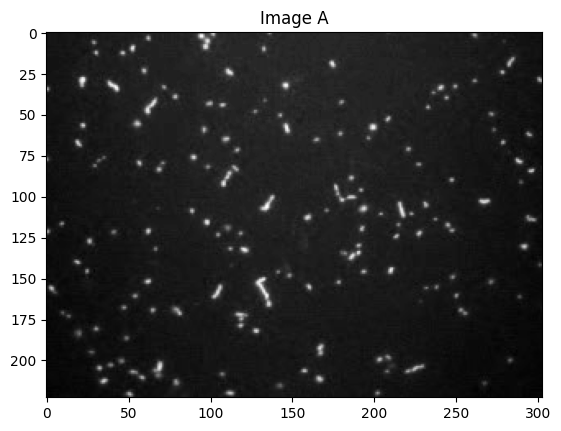

In [4]:
# prompt: visualize image_dict['A']

import matplotlib.pyplot as plt
if 'A' in image_dict:
  plt.imshow(image_dict['A'], cmap='gray')
  plt.title('Image A')
  plt.show()
else:
  print("Image 'A' not found in image_dict.")

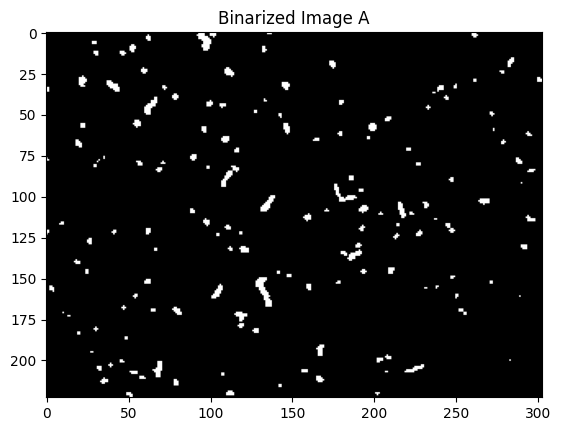

In [ ]:
# prompt: binarize image_dict['A']

import matplotlib.pyplot as plt
import cv2

if 'A' in image_dict:
  img_A = image_dict['A']
  # Apply Otsu's thresholding to binarize the image
  ret, thresh_img = cv2.threshold(img_A, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  # Display the binarized image
  plt.imshow(thresh_img, cmap='gray')
  plt.title('Binarized Image A')
  plt.show()
else:
  print("Image 'A' not found in image_dict.")

In [ ]:
# prompt: Binarize image_dict['A'] using the Otsu method. For the binarized image, calculate the area of each connected region and plot the histogram. Then highlight the large regions (area over 20). In the highlight image, put image_dict['A'] in the blue channel and put the values of the highlighted regions in the red channel.

import matplotlib.pyplot as plt
import numpy as np
if 'A' in image_dict:
  img_A = image_dict['A']
  # Apply Otsu's thresholding to binarize the image
  ret, thresh_img = cv2.threshold(img_A, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  # Find connected components
  num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh_img, connectivity=8)

  # Calculate area of each connected region
  areas = stats[1:, cv2.CC_STAT_AREA]

  # Plot histogram of areas
  plt.hist(areas, bins=50, density=True)
  plt.xlabel('Area')
  plt.ylabel('Frequency')
  plt.title('Histogram of Connected Region Areas')
  plt.show()

  # Highlight large regions (area > 20)
  highlighted_img = np.zeros((img_A.shape[0], img_A.shape[1], 3), dtype=np.uint8)
  highlighted_img[:,:,0] = img_A # Blue channel is original image
  for i in range(1, num_labels):
    if areas[i-1] > 15:
      # Find pixels belonging to the current connected component
      highlighted_img[:,:,1][labels==i] = img_A[labels==i]
      highlighted_img[:,:,2][labels==i] = img_A[labels==i]


  # Display the highlighted image
  plt.imshow(cv2.cvtColor(highlighted_img, cv2.COLOR_BGR2RGB))
  plt.title('Highlighted Image A')
  plt.show()
else:
  print("Image 'A' not found in image_dict.")


NameError: name 'image_dict' is not defined

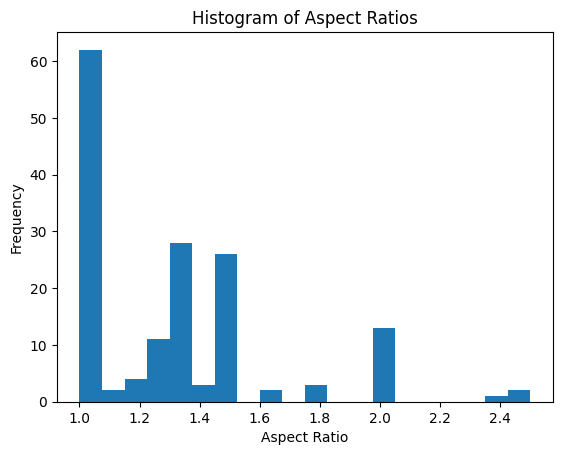

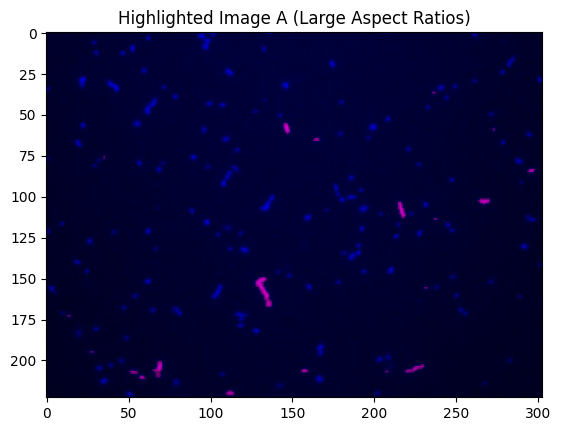

In [ ]:
# prompt: # prompt: Binarize image_dict['A'] using the Otsu method. For the binarized image, calculate the aspect ratios of each connected region and plot the histogram. Then highlight the large aspect ratio (>1.5). In the highlight image, put image_dict['A'] in the blue channel and put the values of the highlighted regions in the red channel.

if 'A' in image_dict:
  img_A = image_dict['A']
  # Apply Otsu's thresholding to binarize the image
  ret, thresh_img = cv2.threshold(img_A, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  # Find connected components
  num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh_img, connectivity=8)

  aspect_ratios = []
  for i in range(1, num_labels):
      x = stats[i, cv2.CC_STAT_LEFT]
      y = stats[i, cv2.CC_STAT_TOP]
      w = stats[i, cv2.CC_STAT_WIDTH]
      h = stats[i, cv2.CC_STAT_HEIGHT]
      if w > 0 and h > 0:
        if w > h:
          aspect_ratio = float(w) / h
        else:
          aspect_ratio = float(h) / w
      aspect_ratios.append(aspect_ratio)

  # Plot the histogram of aspect ratios
  plt.hist(aspect_ratios, bins=20)
  plt.xlabel('Aspect Ratio')
  plt.ylabel('Frequency')
  plt.title('Histogram of Aspect Ratios')
  plt.show()


  # Highlight regions with large aspect ratios (>1.8)
  highlighted_img = np.zeros((img_A.shape[0], img_A.shape[1], 3), dtype=np.uint8)
  highlighted_img[:,:,0] = img_A # Blue channel is original image

  for i in range(1, num_labels):
      x = stats[i, cv2.CC_STAT_LEFT]
      y = stats[i, cv2.CC_STAT_TOP]
      w = stats[i, cv2.CC_STAT_WIDTH]
      h = stats[i, cv2.CC_STAT_HEIGHT]
      if w > 0 and h > 0:
        if w > h:
          aspect_ratio = float(w) / h
        else:
          aspect_ratio = float(h) / w
      if aspect_ratio > 1.6:
          highlighted_img[:,:,2][labels==i] = img_A[labels==i]  # Red channel highlights large aspect ratios

  # Display the highlighted image
  plt.imshow(cv2.cvtColor(highlighted_img, cv2.COLOR_BGR2RGB))
  plt.title('Highlighted Image A (Large Aspect Ratios)')
  plt.show()
else:
  print("Image 'A' not found in image_dict.")

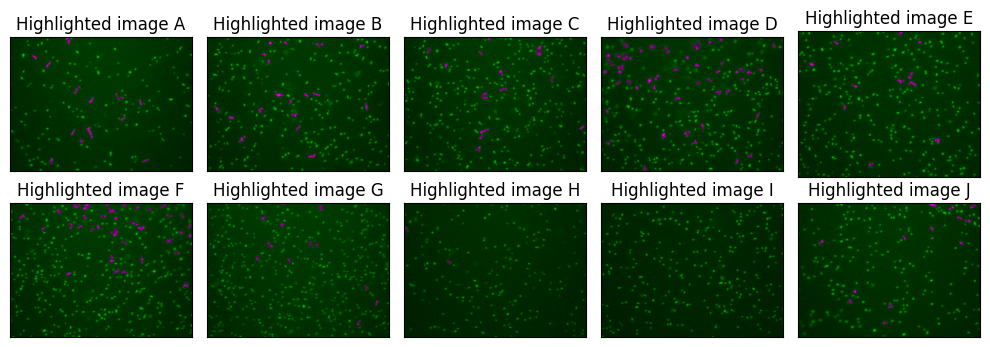

In [ ]:
# prompt: Binarize image_dict['A'] using the Otsu method. For the binarized image, calculate the area of each connected region and plot the histogram. Then highlight the large regions (area over 20). In the highlight image, put image_dict['A'] in the blue channel and put the values of the highlighted regions in the red channel.

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(ncols = 5, nrows = 2, figsize = (10,3.6))
axss = axs.flatten()

for n in range(len(list(image_dict.keys()))):
  name = list(image_dict.keys())[n]
  if name in image_dict:
    img_A = image_dict[name]
    # Apply Otsu's thresholding to binarize the image
    ret, thresh_img = cv2.threshold(img_A, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh_img, connectivity=8)

    # Calculate area of each connected region
    areas = stats[1:, cv2.CC_STAT_AREA]

    # Highlight large regions (area > 20)
    highlighted_img = np.zeros((img_A.shape[0], img_A.shape[1], 3), dtype=np.uint8)
    highlighted_img[:,:,1] = img_A # Green channel is original image
    for i in range(1, num_labels):
      if areas[i-1] > 25:
        # Find pixels belonging to the current connected component
        #mask = (labels == i).astype(np.uint8) * 255
        #highlighted_img[:,:,2] = np.where(mask == 255, 255, highlighted_img[:,:,2]) # Red channel for large regions
        highlighted_img[:,:,2][labels==i] = 1*img_A[labels==i]
        highlighted_img[:,:,1][labels==i] = 0
        highlighted_img[:,:,0][labels==i] = 1*img_A[labels==i]


    # Display the highlighted image
    axss[n].imshow(cv2.cvtColor(highlighted_img, cv2.COLOR_BGR2RGB))
    axss[n].set_title('Highlighted image '+name)

    axss[n].set_xticks([])
    axss[n].set_yticks([])
  else:
    print("Image", name, "not found in image_dict.")

fig.tight_layout()

fig.savefig('/content/Carini_et_al_reanalysis.pdf')
fig.show()